# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **Shift + Enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Other Company Data

In this notebook, you will learn to fetch other company data. The following data are fetched using the `yfinance` package:

1. [Analyst Recommendations](#analyst)
1. [Earnings Calendar](#calendar)
1. [Corporate Actions](#actions)

## Import Libraries

In [1]:
# Import the yfinance library
import yfinance as yf

# Import data manipulation library
import pandas as pd

# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import time manipulation library
from datetime import timedelta

# Import the yahoo finance library for earnings calendar
from yahoo_fin.stock_info import get_earnings_history

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Define the Stock Ticker

Define the stock ticker whose data will be fetched.

In [2]:
# Define the asset ticker for the company
stock_ticker_symbol = 'AAPL'
stock_ticker = yf.Ticker(stock_ticker_symbol)

<a id='analyst'></a> 
## Analyst Recommendations

The analyst recommendations are the views of the various investment bank/advisory firm for the selected stock ticker.

In [3]:
# Analyst recommendations
analyst_recommendations = stock_ticker.get_recommendations()

# Print the last 10 recommendations
analyst_recommendations.tail(10)

,Firm,To Grade,From Grade,Action
Date,,,,
2021-07-28 11:04:39,Barclays,Equal-Weight,,main
2021-07-28 12:04:58,Morgan Stanley,Overweight,,main
2021-07-28 12:30:58,Wells Fargo,Overweight,,main
2021-07-28 13:19:21,Canaccord Genuity,Buy,,main
2021-07-28 14:04:02,Piper Sandler,Overweight,,main
2021-07-28 14:08:03,Deutsche Bank,Buy,,main
2021-07-28 14:20:34,Loop Capital,Buy,,main
2021-09-01 13:06:05,Wolfe Research,Peer Perform,Underperform,up
2021-09-09 13:49:40,Piper Sandler,Overweight,,main


<a id='calendar'></a> 
## Earnings Calendar

Earnings calendar is the schedule according to which various publicly-traded companies announce their earnings for a certain period such as a quarter or a year.

In [4]:
# Fetch the earnings calendar of the stock and store it in a DataFrame
earnings_list = get_earnings_history(stock_ticker_symbol)
earnings_calendar = pd.DataFrame(earnings_list).dropna().head(4)[['startdatetime']]
earnings_calendar.startdatetime = pd.to_datetime(earnings_calendar.startdatetime).dt.strftime('%Y-%m-%d')

# Future earnings announcement dates
upcoming_calendar = pd.DataFrame(earnings_list).head(4)[['startdatetime']]
upcoming_calendar.startdatetime = pd.to_datetime(upcoming_calendar.startdatetime).dt.strftime('%Y-%m-%d')

# Preview the last 4 quarters
print(f"Dates for last 4 earnings report {stock_ticker_symbol} \
    \n{', '.join(earnings_calendar.startdatetime)}")

# Print the future earnings announcement date
print(f"\n\nUpcoming earnings announcement date for {stock_ticker_symbol} \
    \n{', '.join(upcoming_calendar.startdatetime)}")

Dates for last 4 earnings report AAPL     
2021-07-27, 2021-04-28, 2021-01-27, 2020-10-29


Upcoming earnings announcement date for AAPL     
2022-07-25, 2022-04-26, 2022-01-25, 2021-10-27


<a id='actions'></a> 
## Corporate Actions

A corporate action is any activity that a company does which brings material impact to its stakeholders. Common corporate actions include the payment of dividends and stock splits.

Dividends are the distribution of a company's earnings to its shareholders. A stock split is an action by which, the number of shares of a company is increased by a specified multiple, while the share price is decreased by the same factor as the multiple.

Last 10 corporate actions 
            Dividends  Stock Splits
Date                               
2019-08-09     0.1925           0.0
2019-11-07     0.1925           0.0
2020-02-07     0.1925           0.0
2020-05-08     0.2050           0.0
2020-08-07     0.2050           0.0
2020-08-31     0.0000           4.0
2020-11-06     0.2050           0.0
2021-02-05     0.2050           0.0
2021-05-07     0.2200           0.0
2021-08-06     0.2200           0.0


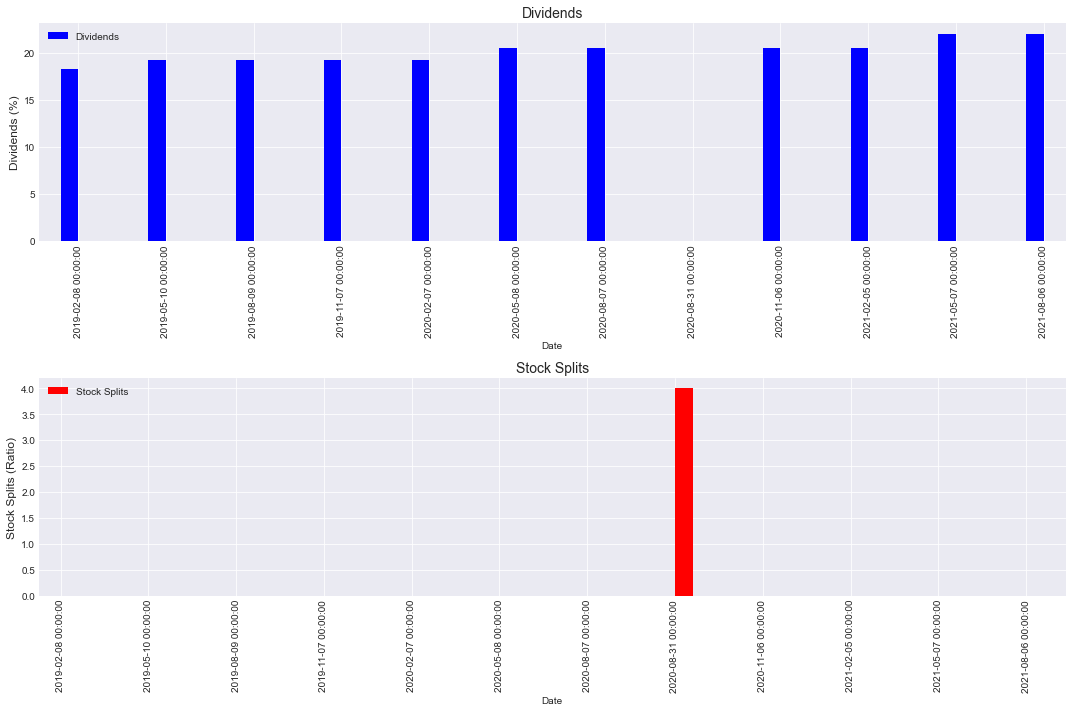

In [5]:
# Corporate actions
corporate_actions = stock_ticker.get_actions()

# Print the last 10 corporate actions
print(f"Last 10 corporate actions \n{corporate_actions.tail(10)}")

# Plot the net income and revenue for the last 3 years
data_to_plot = corporate_actions.tail(12)

# Define the plot figure
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
width = 0.2

# Plot the data
(data_to_plot['Dividends'] * 100).plot(kind='bar', color='blue', ax=ax1, width=width, position=1)
data_to_plot['Stock Splits'].plot(kind='bar', color='red', ax=ax2, width=width, position=0)

# Set title and labels for the plot
ax1.set_ylabel('Dividends (%)', fontsize=12)
ax2.set_ylabel('Stock Splits (Ratio)', fontsize=12)
ax1.set_title('Dividends', fontsize=14)
ax2.set_title('Stock Splits', fontsize=14)
ax1.legend(loc=2)
ax2.legend(loc=2)
plt.tight_layout()
plt.show()

As we can see from the trend, dividends are more common than stock splits. This is because dividends are usually paid every quarter whereas stock splits require special approval from the company's board of directors.

In the upcoming unit, you can refer to additional sources of fundamental stock data. <br><br>